In [141]:
import pandas as pd
pd.pandas.set_option('display.max_columns', None)

In [142]:
df=pd.read_csv("train.csv")
df_test=pd.read_csv("test.csv")

In [143]:
df

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,9276_01,Europa,False,A/98/P,55 Cancri e,41.0,True,0.0,6819.0,0.0,1643.0,74.0,Gravior Noxnuther,False
8689,9278_01,Earth,True,G/1499/S,PSO J318.5-22,18.0,False,0.0,0.0,0.0,0.0,0.0,Kurta Mondalley,False
8690,9279_01,Earth,False,G/1500/S,TRAPPIST-1e,26.0,False,0.0,0.0,1872.0,1.0,0.0,Fayey Connon,True
8691,9280_01,Europa,False,E/608/S,55 Cancri e,32.0,False,0.0,1049.0,0.0,353.0,3235.0,Celeon Hontichre,False


In [144]:
df.HomePlanet.value_counts()

Earth     4602
Europa    2131
Mars      1759
Name: HomePlanet, dtype: int64

In [145]:
df['HomePlanet'].fillna(df['HomePlanet'].mode()[0], inplace=True)
df_test['HomePlanet'].fillna(df['HomePlanet'].mode()[0], inplace=True)

In [146]:
df = pd.get_dummies(df, columns = ["HomePlanet"])
df_test = pd.get_dummies(df_test, columns = ["HomePlanet"])

In [147]:
df.CryoSleep.value_counts()

False    5439
True     3037
Name: CryoSleep, dtype: int64

In [148]:
df['CryoSleep'].fillna(df['CryoSleep'].mode()[0], inplace=True)
df_test['CryoSleep'].fillna(df['CryoSleep'].mode()[0], inplace=True)

In [149]:
df['CryoSleep'] = df['CryoSleep'].replace({False: 0, True: 1})
df_test['CryoSleep'] = df_test['CryoSleep'].replace({False: 0, True: 1})
df['CryoSleep'] = df['CryoSleep'].astype(int)
df_test['CryoSleep'] = df_test['CryoSleep'].astype(int)

In [150]:
df.isnull().sum()

PassengerId            0
CryoSleep              0
Cabin                199
Destination          182
Age                  179
VIP                  203
RoomService          181
FoodCourt            183
ShoppingMall         208
Spa                  183
VRDeck               188
Name                 200
Transported            0
HomePlanet_Earth       0
HomePlanet_Europa      0
HomePlanet_Mars        0
dtype: int64

In [151]:
df.Cabin.nunique()

6560

In [152]:
df.Cabin.sample(5)

3791     F/765/S
8521    G/1465/S
3836     G/675/S
5104     E/343/P
8614     E/603/S
Name: Cabin, dtype: object

In [153]:
for i, row in df.iterrows():
    if type(row['Cabin']) == str:
        # Cabin_num
        cabin_num = row['Cabin'].split('/')[1]
        df.at[i, 'Cabin_num'] = cabin_num
        
        # Cabin_deck
        cabin_deck = row['Cabin'][0]
        df.at[i, 'Cabin_deck'] = cabin_deck
        
        # Cabin_side
        cabin_side = row['Cabin'][-1]
        df.at[i, 'Cabin_side'] = cabin_side
    else:
        df.at[i, 'Cabin_num'] = None
        df.at[i, 'Cabin_deck'] = None
        df.at[i, 'Cabin_side'] = None
        
        
for i, row in df_test.iterrows():
    if type(row['Cabin']) == str:
        # Cabin_num
        cabin_num = row['Cabin'].split('/')[1]
        df_test.at[i, 'Cabin_num'] = cabin_num
        
        # Cabin_deck
        cabin_deck = row['Cabin'][0]
        df_test.at[i, 'Cabin_deck'] = cabin_deck
        
        # Cabin_side
        cabin_side = row['Cabin'][-1]
        df_test.at[i, 'Cabin_side'] = cabin_side
    else:
        df_test.at[i, 'Cabin_num'] = None
        df_test.at[i, 'Cabin_deck'] = None
        df_test.at[i, 'Cabin_side'] = None

In [154]:
df.drop(columns=["Cabin"], inplace=True)
df_test.drop(columns=["Cabin"], inplace=True)

In [155]:
import seaborn as sns

<AxesSubplot:xlabel='Cabin_num', ylabel='Density'>

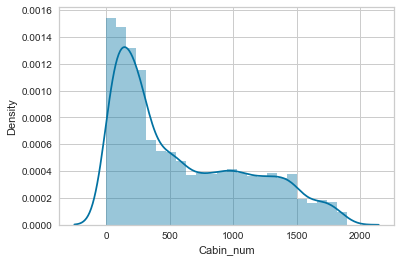

In [156]:
sns.distplot(df.Cabin_num)

In [157]:
df.Cabin_num.nunique()

1817

In [158]:
df.drop(columns='Cabin_num', inplace=True)
df_test.drop(columns='Cabin_num', inplace=True)

In [159]:
import numpy as np
# Sütundaki null değerleri say
null_count = df['Cabin_deck'].isnull().sum()

# En çok tekrar eden ilk ve ikinci değerleri belirle
most_common_values = df['Cabin_deck'].value_counts().index[:2].tolist()

# Null değerlerin yarısını en çok tekrar eden ilk değerle, diğer yarısını ise en çok tekrar eden ikinci değerle doldur
df['Cabin_deck'].fillna({i: np.random.choice(most_common_values, p=[0.5, 0.5]) for i in df.index[df['Cabin_deck'].isnull()].tolist()[:null_count//2] + 
                        df.index[df['Cabin_deck'].isnull()].tolist()[null_count//2:]}, inplace=True)

In [160]:
# Sütundaki null değerleri say
null_count = df_test['Cabin_deck'].isnull().sum()

# En çok tekrar eden ilk ve ikinci değerleri belirle
most_common_values = df_test['Cabin_deck'].value_counts().index[:2].tolist()

# Null değerlerin yarısını en çok tekrar eden ilk değerle, diğer yarısını ise en çok tekrar eden ikinci değerle doldur
df_test['Cabin_deck'].fillna({i: np.random.choice(most_common_values, p=[0.5, 0.5]) for i in df_test.index[df_test['Cabin_deck'].isnull()].tolist()[
    :null_count//2] + df_test.index[df_test['Cabin_deck'].isnull()].tolist()[null_count//2:]}, inplace=True)

In [161]:
df.Cabin_deck.value_counts()

F    2899
G    2653
E     876
B     779
C     747
D     478
A     256
T       5
Name: Cabin_deck, dtype: int64

In [162]:
mapping_cabin_d = {'A': 1, 'B': 2, 'C': 2,'D': 2, 'E': 3, 'F': 4,'G':5,'T':6}

# replace() metodunu kullanarak değişikliği uyguluyoruz
df['Cabin_deck'] = df['Cabin_deck'].replace(mapping_cabin_d)
df_test['Cabin_deck'] = df_test['Cabin_deck'].replace(mapping_cabin_d)

df_test['Cabin_deck'] = df_test['Cabin_deck'].astype(int)
df['Cabin_deck'] = df['Cabin_deck'].astype(int)

In [163]:
df.Cabin_side.value_counts()

S    4288
P    4206
Name: Cabin_side, dtype: int64

In [164]:
# Sütundaki null değerleri say
null_count = df['Cabin_side'].isnull().sum()

# En çok tekrar eden ilk ve ikinci değerleri belirle
most_common_values = df['Cabin_side'].value_counts().index[:2].tolist()

# Null değerlerin yarısını en çok tekrar eden ilk değerle, diğer yarısını ise en çok tekrar eden ikinci değerle doldur
df['Cabin_side'].fillna({i: np.random.choice(most_common_values, p=[0.5, 0.5]) for i in df.index[df['Cabin_side'].isnull()].tolist()[:null_count//2] + 
                        df.index[df['Cabin_side'].isnull()].tolist()[null_count//2:]}, inplace=True)

In [165]:
null_count = df_test['Cabin_side'].isnull().sum()

# En çok tekrar eden ilk ve ikinci değerleri belirle
most_common_values = df_test['Cabin_side'].value_counts().index[:2].tolist()

# Null değerlerin yarısını en çok tekrar eden ilk değerle, diğer yarısını ise en çok tekrar eden ikinci değerle doldur
df_test['Cabin_side'].fillna({i: np.random.choice(most_common_values, p=[0.5, 0.5]) for i in df_test.index[df_test['Cabin_side'].isnull()].tolist()[
    :null_count//2] + df_test.index[df_test['Cabin_side'].isnull()].tolist()[null_count//2:]}, inplace=True)

In [166]:
df.Cabin_side.value_counts()

S    4395
P    4298
Name: Cabin_side, dtype: int64

In [167]:
'''
S:1
P:0
'''

df['Cabin_side'] = df['Cabin_side'].replace({'S': 1, 'P': 0})
df_test['Cabin_side'] = df_test['Cabin_side'].replace({'S': 1, 'P': 0})
df['Cabin_side'] = df['Cabin_side'].astype(int)
df_test['Cabin_side'] = df_test['Cabin_side'].astype(int)

In [168]:
df.Destination.value_counts()

TRAPPIST-1e      5915
55 Cancri e      1800
PSO J318.5-22     796
Name: Destination, dtype: int64

In [169]:
df_test.Destination.value_counts()

TRAPPIST-1e      2956
55 Cancri e       841
PSO J318.5-22     388
Name: Destination, dtype: int64

In [170]:
df['Destination'].fillna(value='TRAPPIST-1e', limit=int(5915*182/8692), inplace=True)
df['Destination'].fillna(value='55 Cancri e', limit=int(1800*182/8692), inplace=True)
df['Destination'].fillna(value='PSO J318.5-22', limit=int(796*192/8692), inplace=True)

# Kalan null değerleri veri setinin moduyla dolduralım
df['Destination'].fillna(df['Destination'].mode()[0], inplace=True)

In [171]:
df_test['Destination'].fillna(value='TRAPPIST-1e', limit=int(2956*92/4277), inplace=True)
df_test['Destination'].fillna(value='55 Cancri e', limit=int(841*92/4277), inplace=True)
df_test['Destination'].fillna(value='PSO J318.5-22', limit=int(388*92/4277), inplace=True)

# Kalan null değerleri veri setinin moduyla dolduralım
df_test['Destination'].fillna(df_test['Destination'].mode()[0], inplace=True)

In [172]:
df = pd.get_dummies(df, columns = ["Destination"])
df_test = pd.get_dummies(df_test, columns = ["Destination"])

In [173]:
df["Age"].fillna(df.Age.mean(), inplace=True)
df_test["Age"].fillna(df.Age.mean(), inplace=True)

In [174]:
from sklearn import preprocessing

<AxesSubplot:ylabel='Density'>

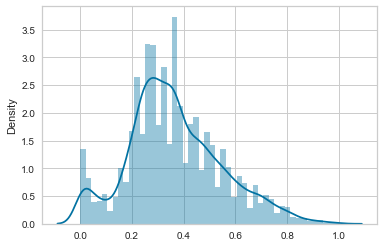

In [175]:
sns.distplot(preprocessing.minmax_scale(df.Age))

In [176]:
df["Age"]=preprocessing.minmax_scale(df.Age)
df_test["Age"]=preprocessing.minmax_scale(df_test.Age)

In [177]:
df_test.VIP.value_counts()

False    4110
True       74
Name: VIP, dtype: int64

In [178]:
df['VIP'].fillna(value='False', limit=int(8291*203/8692), inplace=True)
df['VIP'].fillna(value='True', limit=int(199*203/8692), inplace=True)

# Kalan null değerleri veri setinin moduyla dolduralım
df['VIP'].fillna(df['VIP'].mode()[0], inplace=True)

In [179]:
df_test['VIP'].fillna(value='False', limit=int(4110*93/4277), inplace=True)
df_test['VIP'].fillna(value='True', limit=int(74*93/4277), inplace=True)

# Kalan null değerleri veri setinin moduyla dolduralım
df_test['VIP'].fillna(df_test['VIP'].mode()[0], inplace=True)

In [180]:
df['VIP'] = df['VIP'].replace({'True': 1, 'False': 0})
df_test['VIP'] = df_test['VIP'].replace({'True': 1, 'False': 0})
df['VIP'] = df['VIP'].astype(int)
df_test['VIP'] = df_test['VIP'].astype(int)

In [181]:
df["RoomService"].fillna(df.RoomService.mean(), inplace=True)
df_test["RoomService"].fillna(df.RoomService.mean(), inplace=True)

<AxesSubplot:ylabel='Density'>

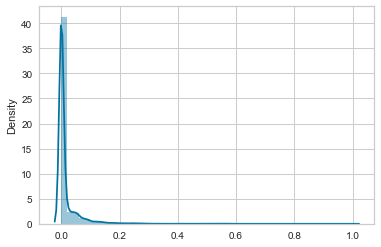

In [182]:
sns.distplot(preprocessing.minmax_scale(df.RoomService))

In [183]:
df["RoomService"]=preprocessing.minmax_scale(df.RoomService)
df_test["RoomService"]=preprocessing.minmax_scale(df_test.RoomService)

In [184]:
df["FoodCourt"].fillna(df.FoodCourt.mean(), inplace=True)
df_test["FoodCourt"].fillna(df.FoodCourt.mean(), inplace=True)

df["FoodCourt"]=preprocessing.minmax_scale(df.FoodCourt)
df_test["FoodCourt"]=preprocessing.minmax_scale(df_test.FoodCourt)

<AxesSubplot:xlabel='FoodCourt', ylabel='Density'>

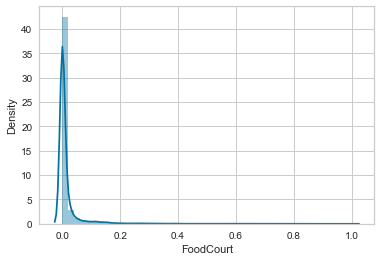

In [185]:
sns.distplot(df.FoodCourt)

In [186]:
df["ShoppingMall"].fillna(df.ShoppingMall.mean(), inplace=True)
df_test["ShoppingMall"].fillna(df.ShoppingMall.mean(), inplace=True)

df["ShoppingMall"]=preprocessing.minmax_scale(df.ShoppingMall)
df_test["ShoppingMall"]=preprocessing.minmax_scale(df_test.ShoppingMall)

<AxesSubplot:xlabel='ShoppingMall', ylabel='Density'>

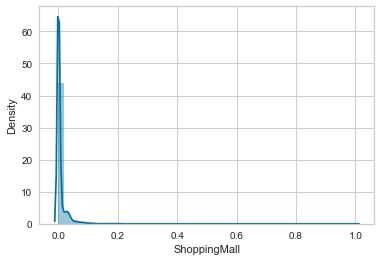

In [187]:
sns.distplot(df.ShoppingMall)

In [188]:
df["Spa"].fillna(df.Spa.mean(), inplace=True)
df_test["Spa"].fillna(df.Spa.mean(), inplace=True)

df["Spa"]=preprocessing.minmax_scale(df.Spa)
df_test["Spa"]=preprocessing.minmax_scale(df_test.Spa)

<AxesSubplot:xlabel='Spa', ylabel='Density'>

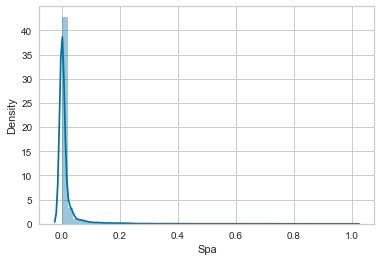

In [189]:
sns.distplot(df.Spa)

In [190]:
df["VRDeck"].fillna(df.VRDeck.mean(), inplace=True)
df_test["VRDeck"].fillna(df.VRDeck.mean(), inplace=True)

df["VRDeck"]=preprocessing.minmax_scale(df.VRDeck)
df_test["VRDeck"]=preprocessing.minmax_scale(df_test.VRDeck)

In [191]:
df['Transported'] = df['Transported'].replace({'True': 1, 'False': 0})

df['Transported'] = df['Transported'].astype(int)


In [271]:
from sklearn.preprocessing import Normalizer





normalizer = Normalizer()
df[['Age', 'RoomService','FoodCourt','ShoppingMall','Spa','VRDeck']] = normalizer.fit_transform(df[[
    'Age', 'RoomService','FoodCourt','ShoppingMall','Spa','VRDeck']])

In [276]:
df_test[['Age', 'RoomService','FoodCourt','ShoppingMall','Spa','VRDeck']] = normalizer.fit_transform(df_test[[
    'Age', 'RoomService','FoodCourt','ShoppingMall','Spa','VRDeck']])

In [273]:
from pycaret.classification import setup
clf = setup(df.drop(columns=['Name','PassengerId']), target='Transported', preprocess=False)
from pycaret.classification import compare_models
models = compare_models()

,Description,Value
0,Session id,5228
1,Target,Transported
2,Target type,Binary
3,Original data shape,"(8693, 17)"
4,Transformed data shape,"(8693, 17)"
5,Transformed train set shape,"(6085, 17)"
6,Transformed test set shape,"(2608, 17)"
7,Numeric features,16


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
catboost,CatBoost Classifier,0.8018,0.8853,0.8018,0.8029,0.8016,0.6034,0.6046,0.9830
lightgbm,Light Gradient Boosting Machine,0.7993,0.8793,0.7993,0.8005,0.7991,0.5985,0.5998,0.4390
gbc,Gradient Boosting Classifier,0.7964,0.8771,0.7964,0.7978,0.7961,0.5926,0.5940,0.4120
rf,Random Forest Classifier,0.7877,0.8748,0.7877,0.7886,0.7875,0.5753,0.5763,0.3790
et,Extra Trees Classifier,0.7865,0.8638,0.7865,0.7871,0.7864,0.5729,0.5735,0.3720
ada,Ada Boost Classifier,0.7847,0.8689,0.7847,0.7854,0.7846,0.5693,0.5700,0.3740
svm,SVM - Linear Kernel,0.7752,0.0000,0.7752,0.7851,0.7730,0.5503,0.5601,0.3690
lr,Logistic Regression,0.7747,0.8631,0.7747,0.7762,0.7745,0.5496,0.5509,0.7600
lda,Linear Discriminant Analysis,0.7722,0.8610,0.7722,0.7748,0.7718,0.5447,0.5471,0.3140
ridge,Ridge Classifier,0.7714,0.0000,0.7714,0.7741,0.7709,0.5431,0.5456,0.3190


Processing:   0%|          | 0/69 [00:00<?, ?it/s]

In [274]:
from pycaret.classification import *
catboost = create_model('catboost')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.7931,0.8885,0.7931,0.7958,0.7925,0.5858,0.5887
1,0.7718,0.8722,0.7718,0.7741,0.7711,0.5431,0.5456
2,0.7997,0.8886,0.7997,0.7998,0.7996,0.5992,0.5994
3,0.8128,0.8912,0.8128,0.8130,0.8128,0.6255,0.6257
4,0.8259,0.8923,0.8259,0.8294,0.8254,0.6516,0.6552
5,0.7977,0.8857,0.7977,0.7979,0.7976,0.5953,0.5956
6,0.7977,0.8761,0.7977,0.7978,0.7977,0.5953,0.5955
7,0.8109,0.8901,0.8109,0.8109,0.8109,0.6217,0.6217
8,0.8092,0.8875,0.8092,0.8111,0.8089,0.6182,0.6201


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [277]:
from pycaret.classification import predict_model
predicts=predict_model(catboost, data=df_test.drop(columns=['PassengerId','Name']))
predicts = predicts.rename(columns={'prediction_label': 'Transported'})
predicts

,CryoSleep,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,HomePlanet_Earth,HomePlanet_Europa,HomePlanet_Mars,Cabin_deck,Cabin_side,Destination_55 Cancri e,Destination_PSO J318.5-22,Destination_TRAPPIST-1e,Transported,prediction_score
0,1,1.000000,0,0.000000,0.000000,0.000000,0.000000,0.000000,1,0,0,5,1,0,0,1,1,0.6798
1,0,0.860703,0,0.000000,0.001274,0.000000,0.509106,0.000000,1,0,0,4,1,0,0,1,0,0.9750
2,1,1.000000,0,0.000000,0.000000,0.000000,0.000000,0.000000,0,1,0,2,1,1,0,0,1,0.9973
3,0,0.876129,0,0.000000,0.479410,0.000000,0.016613,0.047842,0,1,0,2,1,0,0,1,1,0.9783
4,0,0.957163,0,0.003269,0.000000,0.289532,0.000000,0.000000,1,0,0,4,1,0,0,1,1,0.9211
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4272,1,1.000000,0,0.000000,0.000000,0.000000,0.000000,0.000000,1,0,0,5,1,0,0,1,1,0.6798
4273,0,0.997938,0,0.000000,0.062908,0.003848,0.000946,0.012136,1,0,0,4,0,0,0,1,0,0.5769
4274,1,1.000000,0,0.000000,0.000000,0.000000,0.000000,0.000000,0,0,1,2,0,1,0,0,1,0.9441
4275,0,0.958447,0,0.000000,0.278522,0.000000,0.000000,0.061677,0,1,0,2,0,0,0,1,1,0.8231


In [278]:
predicts["PassengerId"]=df_test["PassengerId"]
submission=predicts[["PassengerId","Transported"]]
submission['Transported'] = submission['Transported'].replace({1: 'True', 0: 'False'})
df['Transported'] = df['Transported'].astype(str)

In [279]:
submission.to_csv('submission_pycaretcat_norm.csv', index=False)

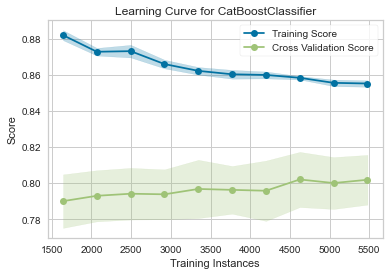

In [280]:
plot_model(catboost, plot='learning')

In [282]:
plot_model(catboost, plot='auc')

ValueError: y_true takes value in {'0', '1'} and pos_label is not specified: either make y_true take value in {0, 1} or {-1, 1} or pass pos_label explicitly.

<Figure size 432x288 with 0 Axes>

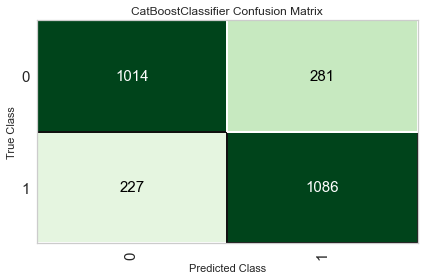

In [283]:
plot_model(catboost, plot='confusion_matrix')

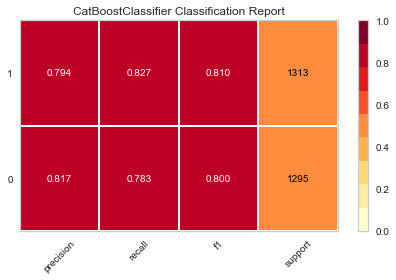

In [284]:
plot_model(catboost, plot='class_report')

In [285]:
catboost_regular_norm = create_model('catboost', 
                        fold = 10,
                        verbose = False,
                        l2_leaf_reg = 3)

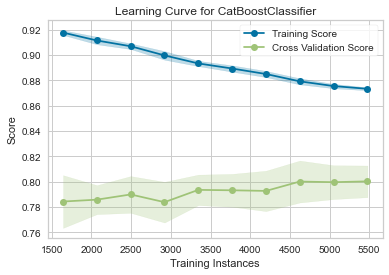

In [286]:
plot_model(catboost_regular_norm, plot='learning')

In [287]:
plot_model(catboost_regular_norm, plot='auc')

ValueError: y_true takes value in {'0', '1'} and pos_label is not specified: either make y_true take value in {0, 1} or {-1, 1} or pass pos_label explicitly.

<Figure size 432x288 with 0 Axes>

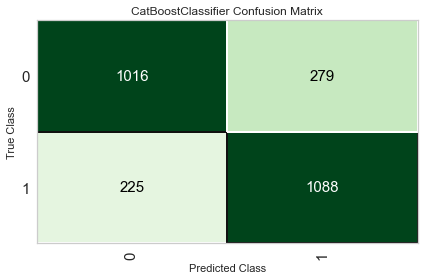

In [288]:
plot_model(catboost_regular_norm, plot='confusion_matrix')

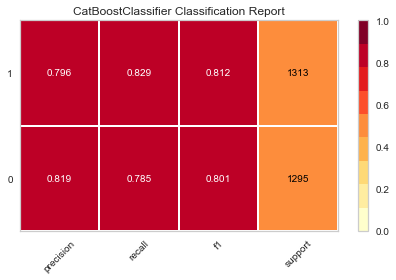

In [289]:
plot_model(catboost_regular_norm, plot='class_report')

In [290]:
predicts=predict_model(catboost_regular_norm, data=df_test.drop(columns=['PassengerId','Name']))
predicts = predicts.rename(columns={'prediction_label': 'Transported'})
predicts

,CryoSleep,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,HomePlanet_Earth,HomePlanet_Europa,HomePlanet_Mars,Cabin_deck,Cabin_side,Destination_55 Cancri e,Destination_PSO J318.5-22,Destination_TRAPPIST-1e,Transported,prediction_score
0,1,1.000000,0,0.000000,0.000000,0.000000,0.000000,0.000000,1,0,0,5,1,0,0,1,1,0.6777
1,0,0.860703,0,0.000000,0.001274,0.000000,0.509106,0.000000,1,0,0,4,1,0,0,1,0,0.9827
2,1,1.000000,0,0.000000,0.000000,0.000000,0.000000,0.000000,0,1,0,2,1,1,0,0,1,0.9979
3,0,0.876129,0,0.000000,0.479410,0.000000,0.016613,0.047842,0,1,0,2,1,0,0,1,1,0.9880
4,0,0.957163,0,0.003269,0.000000,0.289532,0.000000,0.000000,1,0,0,4,1,0,0,1,1,0.9241
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4272,1,1.000000,0,0.000000,0.000000,0.000000,0.000000,0.000000,1,0,0,5,1,0,0,1,1,0.6777
4273,0,0.997938,0,0.000000,0.062908,0.003848,0.000946,0.012136,1,0,0,4,0,0,0,1,0,0.5125
4274,1,1.000000,0,0.000000,0.000000,0.000000,0.000000,0.000000,0,0,1,2,0,1,0,0,1,0.9487
4275,0,0.958447,0,0.000000,0.278522,0.000000,0.000000,0.061677,0,1,0,2,0,0,0,1,1,0.8545


In [291]:
predicts["PassengerId"]=df_test["PassengerId"]
submission=predicts[["PassengerId","Transported"]]
submission['Transported'] = submission['Transported'].replace({1: 'True', 0: 'False'})
df['Transported'] = df['Transported'].astype(str)

In [292]:
submission.to_csv('submission_pycaretcat_regularnorm3.csv', index=False)

In [255]:
catboost_regular_tuned = tune_model(catboost_regular)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8325,0.9099,0.8827,0.8042,0.8416,0.6647,0.6680
1,0.7898,0.8794,0.7915,0.7915,0.7915,0.5796,0.5796
2,0.7882,0.8861,0.8143,0.7764,0.7949,0.5762,0.5769
3,0.8161,0.8890,0.8795,0.7826,0.8282,0.6318,0.6368
4,0.7849,0.8894,0.8046,0.7767,0.7904,0.5696,0.5700
5,0.8207,0.8998,0.8464,0.8069,0.8262,0.6413,0.6421
6,0.8059,0.8952,0.8497,0.7831,0.8150,0.6116,0.6139
7,0.7961,0.8854,0.8072,0.7917,0.7994,0.5920,0.5922
8,0.7993,0.8889,0.8170,0.7911,0.8039,0.5986,0.5989


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits
Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


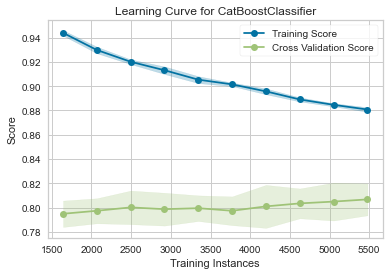

In [256]:
plot_model(catboost_regular_tuned, plot='learning')

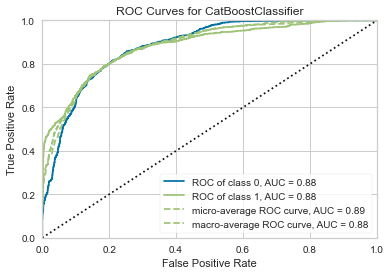

In [257]:
plot_model(catboost_regular_tuned, plot='auc')

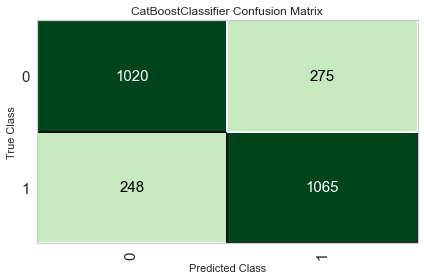

In [258]:
plot_model(catboost_regular_tuned, plot='confusion_matrix')

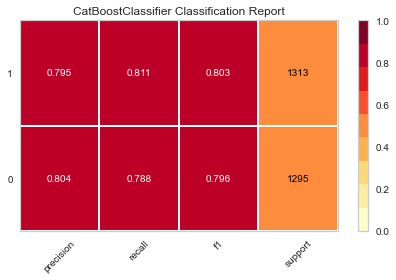

In [259]:
plot_model(catboost_regular_tuned, plot='class_report')

In [260]:
predicts=predict_model(catboost_tuned, data=df_test.drop(columns=['PassengerId','Name']))
predicts = predicts.rename(columns={'prediction_label': 'Transported'})
predicts

,CryoSleep,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,HomePlanet_Earth,HomePlanet_Europa,HomePlanet_Mars,Cabin_deck,Cabin_side,Destination_55 Cancri e,Destination_PSO J318.5-22,Destination_TRAPPIST-1e,Transported,prediction_score
0,1,0.341772,0,0.000000,0.000000,0.00000,0.000000,0.000000,1,0,0,5,1,0,0,1,1,0.7259
1,0,0.240506,0,0.000000,0.000356,0.00000,0.142260,0.000000,1,0,0,4,1,0,0,1,0,0.9956
2,1,0.392405,0,0.000000,0.000000,0.00000,0.000000,0.000000,0,1,0,2,1,1,0,0,1,0.9950
3,0,0.481013,0,0.000000,0.263206,0.00000,0.009121,0.026266,0,1,0,2,1,0,0,1,1,0.9768
4,0,0.253165,0,0.000865,0.000000,0.07658,0.000000,0.000000,1,0,0,4,1,0,0,1,1,0.8513
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4272,1,0.430380,0,0.000000,0.000000,0.00000,0.000000,0.000000,1,0,0,5,1,0,0,1,1,0.7160
4273,0,0.531646,0,0.000000,0.033514,0.00205,0.000504,0.006466,1,0,0,4,0,0,0,1,0,0.7956
4274,1,0.364911,0,0.000000,0.000000,0.00000,0.000000,0.000000,0,0,1,2,0,1,0,0,1,0.9307
4275,0,0.364911,0,0.000000,0.106042,0.00000,0.000000,0.023482,0,1,0,2,0,0,0,1,1,0.8435


In [261]:
submission.to_csv('submission_pycaretcat_tuned_regular.csv', index=False)